In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
blups = pd.read_csv('CHL_blups.csv')

In [16]:
blups = blups.loc[blups['Rep'] == 1 , :]

In [17]:
blups

,genotype,PLOT.ID,rows,ranges,Block,Rep,Trt,year,note,Calibration,ASD,CHL
1,B73,1310,10,7,1,1,HN,2022,BGEM_Tall_early,0.0,1.0,475.092325
3,B73,1139,39,3,1,1,HN,2022,BGEM_Short_early,0.0,1.0,475.092325
6,B73,1008,8,1,1,1,HN,2022,BGEM_Tall_late,0.0,2.0,475.092325
9,B73,1293,43,6,1,1,HN,2022,BGEM_Short_late,0.0,1.0,475.092325
13,B73,1041,41,1,1,1,HN,2022,BGEM_Short_early,0.0,1.0,475.092325
...,...,...,...,...,...,...,...,...,...,...,...,...
2392,PHZ51 x LH123,2572,22,12,2,1,LN,2022,Hybrid,0.0,2.0,315.227603
2394,PHZ51 x PHG35,2542,42,11,2,1,LN,2022,Hybrid,0.0,1.0,308.978928
2396,PHZ51 x PHG35,2506,6,11,2,1,LN,2022,Hybrid,0.0,2.0,308.978928
2398,PHZ51 x PHG35,2500,50,10,2,1,LN,2022,Hybrid,0.0,1.0,308.978928


In [18]:
ids = pd.read_csv('BGEM_WGS_Labels.csv')

In [19]:
GWAS_labels.columns

Index(['UID'], dtype='object')

In [20]:
GWAS_labels = pd.read_csv('WGS_labels_only.csv')

In [21]:
GWAS_labels.rename(columns={'UID                     ': 'UID'}, inplace=True)

In [22]:
GWAS_labels['UID'] = GWAS_labels['UID'].str.replace(' ' , '')

In [23]:
ids = ids.loc[: , ['UID', 'Genotype']]

In [24]:
ids.rename(columns ={'Genotype': 'genotype'}, inplace=True)

In [25]:
GWAS_labels

,UID
0,B001
1,B002
2,B003
3,B004
4,B005
...,...
217,B311
218,B312
219,B313
220,B314


In [26]:
merged = pd.merge(GWAS_labels, ids, on='UID', how='left')

In [27]:
merged

,UID,genotype
0,B001,BGEM-0001-N
1,B002,BGEM-0002-N
2,B003,BGEM-0003-N
3,B004,BGEM-0004-N
4,B005,BGEM-0005-N
...,...,...
217,B311,BGEM-0181-N
218,B312,BGEM-0121-N
219,B313,BGEM-0251-S
220,B314,BGEM-0189-S


In [28]:
merged = pd.merge(merged, blups, on='genotype', how='left')

In [29]:
merged

,UID,genotype,PLOT.ID,rows,ranges,Block,Rep,Trt,year,note,Calibration,ASD,CHL
0,B001,BGEM-0001-N,1313,13,7,1,1,HN,2022,BGEM_Tall_early,0.0,2.0,310.604381
1,B001,BGEM-0001-N,2338,38,7,2,1,LN,2022,BGEM_Tall_early,0.0,2.0,305.224587
2,B002,BGEM-0002-N,1314,14,7,1,1,HN,2022,BGEM_Tall_early,0.0,1.0,400.861723
3,B002,BGEM-0002-N,2339,39,7,2,1,LN,2022,BGEM_Tall_early,NaN,NaN,309.794141
4,B003,BGEM-0003-N,1111,11,3,1,1,HN,2022,BGEM_Tall_late,0.0,1.0,433.836536
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,B313,BGEM-0251-S,2336,36,7,2,1,LN,2022,BGEM_Tall_early,0.0,2.0,329.824417
440,B314,BGEM-0189-S,1265,15,6,1,1,HN,2022,BGEM_Tall_early,0.0,1.0,328.267548
441,B314,BGEM-0189-S,2290,40,6,2,1,LN,2022,BGEM_Tall_early,0.0,2.0,298.973053
442,B315,BGEM-0249-N,1189,39,4,1,1,HN,2022,BGEM_Short_late,0.0,2.0,370.973292


In [30]:
merged.to_csv('blups_CHL_with_gwas_ids')

In [31]:
blups_CHL_HN = merged.loc[merged['Trt'] == 'HN' , ['UID', 'CHL']]
blups_CHL_LN = merged.loc[merged['Trt'] == 'LN' , ['UID', 'CHL']]

In [32]:
blups_CHL_LN.to_csv('blups_CHL_LN.csv' , index=False)
blups_CHL_HN.to_csv('blups_CHL_HN.csv' , index=False)

In [33]:
blups_CHL_HN

,UID,CHL
0,B001,310.604381
2,B002,400.861723
4,B003,433.836536
6,B004,373.498438
8,B005,464.352804
...,...,...
434,B311,389.113594
436,B312,328.799187
438,B313,354.752934
440,B314,328.267548


# adding uids to CHL blues and blups

In [1]:
import pandas as pd
blues = pd.read_csv('blues_CHL_LN_HN_seperately.csv')

In [2]:
blues

,genotype,CHL_LN,CHL_HN
0,B73,382.090624,481.418206
1,BGEM-0001-N,279.544886,275.021749
2,BGEM-0002-N,263.386545,387.872590
3,BGEM-0003-N,298.080737,428.353598
4,BGEM-0004-N,283.994567,359.010910
...,...,...,...
301,BGEM-0325-N,317.956778,425.815526
302,BGEM-0326-N,309.324426,355.800929
303,BGEM-0327-N,290.541292,361.954213
304,BGEM-0328-S,328.639963,379.266291


In [3]:
ids = pd.read_csv('BGEM_WGS_Labels.csv')

In [4]:
GWAS_labels = pd.read_csv('WGS_labels_only.csv')

In [5]:
GWAS_labels.columns

Index(['UID                     '], dtype='object')

In [6]:
GWAS_labels.rename(columns={'UID                     ': 'UID'}, inplace=True)

In [7]:
GWAS_labels['UID'] = GWAS_labels['UID'].str.replace(' ' , '')

In [8]:
ids = ids.loc[: , ['UID', 'Genotype']]

In [9]:
ids.rename(columns ={'Genotype': 'genotype'}, inplace=True)

In [10]:
merged = pd.merge(ids, blues, on='genotype', how='inner')

In [11]:
merged = pd.merge(merged, GWAS_labels, on='UID', how='inner')

In [12]:
merged =merged.loc[:, ['UID', 'CHL_LN', 'CHL_HN']]

In [13]:
merged.loc[:, ['CHL_LN', 'CHL_HN']] = merged.loc[:, ['CHL_LN', 'CHL_HN']].round(decimals=1)

In [14]:
merged

,UID,CHL_LN,CHL_HN
0,B001,279.5,275.0
1,B002,263.4,387.9
2,B003,298.1,428.4
3,B004,284.0,359.0
4,B005,343.6,482.1
...,...,...,...
217,B311,303.3,375.5
218,B312,254.5,287.2
219,B313,352.3,331.7
220,B314,261.6,290.5


In [15]:
merged.to_csv('blues_CHL_with_gwas_ids_only_inbreds.csv', index=False)

In [25]:
merged.boxplot('CHL_LN')

<AxesSubplot: >

In [51]:
blues = pd.read_csv('blues_CHL_LN_HN_seperately_with_hybrids.csv')

In [53]:
merged = pd.merge(ids, blues, on='genotype', how='inner')

In [54]:
merged = pd.merge(merged, GWAS_labels, on='UID', how='inner')

In [56]:
merged =merged.loc[:, ['UID', 'CHL_LN', 'CHL_HN']]

In [58]:
blups = pd.read_csv('blups_CHL_with_gwas_ids_with_hybrids.csv')
blues = merged

In [59]:
merged2 = pd.merge(blups, blues, how='left')

In [61]:
merged2.to_csv('CHL_blups_blues_with_hybrids.csv', index=False)

# merging spectra blups with GWAS Ids

In [2]:
import pandas as pd
import numpy as np
blups = pd.read_csv('spectra_blups_N_combined_nonASD_only_inbreds.csv')

In [3]:
# Create a np array for downsampling for every 5 nm
column_filter = np.arange(1, 2200, 50)
blups_spectra= blups.iloc[:, column_filter]

In [4]:
blups_geno = blups.loc[:, 'genotype']

In [5]:
blups_int = pd.concat([blups_geno, blups_spectra], axis=1)

In [6]:
ids = pd.read_csv('BGEM_WGS_Labels.csv')

In [7]:
GWAS_labels = pd.read_csv('WGS_labels_only.csv')

In [8]:
GWAS_labels.rename(columns={'UID                     ': 'UID'}, inplace=True)

In [9]:
GWAS_labels['UID'] = GWAS_labels['UID'].str.replace(' ' , '')

In [10]:
ids = ids.loc[: , ['UID', 'Genotype']]

In [11]:
ids.rename(columns ={'Genotype': 'genotype'}, inplace=True)

In [12]:
merged = pd.merge(ids, blups_int, on='genotype', how='inner')

In [13]:
merged2 = pd.merge(merged, GWAS_labels, on='UID', how='inner')

In [14]:
merged2.drop(['genotype'], axis=1, inplace=True)

In [15]:
merged2.to_csv('blups_spectra_N_combined_only_inbreds_GWAS_ready.csv', index=False)

In [16]:
merged2

,UID,X350,X400,X450,X500,X550,X600,X650,X700,X750,...,X2050,X2100,X2150,X2200,X2250,X2300,X2350,X2400,X2450,X2500
0,B001,0.082296,0.046531,0.055440,0.065912,0.165976,0.105845,0.071533,0.131935,0.450569,...,0.108947,0.142685,0.168140,0.174738,0.164910,0.141465,0.114851,0.088761,0.063922,0.048542
1,B002,0.080296,0.045596,0.054280,0.063808,0.150755,0.097256,0.067539,0.121333,0.449184,...,0.114609,0.147661,0.172187,0.178576,0.168749,0.145351,0.119007,0.093216,0.067678,0.051602
2,B003,0.077507,0.044477,0.052744,0.062273,0.144077,0.093925,0.065544,0.117633,0.446765,...,0.114890,0.148302,0.172926,0.179161,0.170360,0.148266,0.121237,0.095265,0.069861,0.053559
3,B004,0.081749,0.046392,0.054857,0.064614,0.154818,0.099279,0.068366,0.126324,0.449078,...,0.121734,0.156097,0.180941,0.186820,0.177236,0.154257,0.127713,0.100776,0.073229,0.055202
4,B005,0.082352,0.046344,0.055089,0.064602,0.148535,0.096541,0.067544,0.120918,0.451557,...,0.115569,0.149011,0.173869,0.180169,0.170316,0.146476,0.120511,0.094420,0.068643,0.052253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,B311,0.080219,0.045337,0.053046,0.061712,0.141519,0.090398,0.063123,0.113491,0.445466,...,0.099590,0.131576,0.156000,0.162734,0.154120,0.132300,0.106079,0.081459,0.059063,0.045463
218,B312,0.080119,0.045643,0.054790,0.065985,0.165286,0.108499,0.073811,0.135865,0.447771,...,0.108765,0.141282,0.165982,0.172387,0.162956,0.140220,0.114345,0.088977,0.064616,0.049473
219,B313,0.078888,0.044448,0.052291,0.061335,0.141020,0.090645,0.063109,0.114885,0.445814,...,0.104481,0.137509,0.162715,0.169626,0.160477,0.137362,0.111567,0.086223,0.062048,0.047288
220,B314,0.081071,0.045903,0.054179,0.064272,0.159721,0.101175,0.068150,0.132100,0.449871,...,0.112515,0.147127,0.172813,0.179290,0.169795,0.146253,0.119409,0.092515,0.066234,0.049571


# Spectral Plasticity GWAS


In [1]:
import pandas as pd
import numpy as np

In [2]:
plast = pd.read_csv('spectra_plasticity.csv')

In [3]:
plast_inb = plast.loc[plast['Group'] == 'Inbred' , :]
plast_first_cols = plast_inb.iloc[:, 0:1]
plast_inb_bands = plast_inb.iloc[:, 2:]

In [4]:
# Create a np array for downsampling for every 5 nm
column_filter = np.arange(1540, 2150, 10)
plast_inb_bands = plast_inb_bands.iloc[:, column_filter]

In [5]:
plast_GWAS = pd.concat([plast_first_cols, plast_inb_bands], axis=1)

In [6]:
ids = pd.read_csv('BGEM_WGS_Labels.csv')
GWAS_labels = pd.read_csv('WGS_labels_only.csv')
GWAS_labels.rename(columns={'UID                     ': 'UID'}, inplace=True)
GWAS_labels['UID'] = GWAS_labels['UID'].str.replace(' ' , '')
ids = ids.loc[: , ['UID', 'Genotype']]
ids.rename(columns ={'Genotype': 'genotype'}, inplace=True)

In [7]:
merged = pd.merge(ids, plast_GWAS, on='genotype', how='inner')

In [8]:
merged2 = pd.merge(merged, GWAS_labels, on='UID', how='inner')

In [9]:
merged2.drop(['genotype'], axis=1, inplace=True)

In [10]:
#defining a function to remove the outliers
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1=datacolumn.quantile(0.25)
 Q3=datacolumn.quantile(0.75)
 #Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [11]:
#Outlier treatment
for trait in merged2.columns[1:] : 
    outlier_treatment(merged2.loc[: , trait])
    lowerbound,upperbound = outlier_treatment(merged2.loc[: , trait])
    rm_index =merged2[(merged2[trait] < lowerbound) | (merged2[trait] > upperbound)].index
    merged2.loc[rm_index, trait] = np.nan

In [12]:
merged2.to_csv('spetrum_plasticity_GWAS_ready.csv', index=False)

In [13]:
merged2

,UID,X1890,X1900,X1910,X1920,X1930,X1940,X1950,X1960,X1970,...,X2400,X2410,X2420,X2430,X2440,X2450,X2460,X2470,X2480,X2490
0,B001,0.153,0.153,0.141,0.133,0.132,0.135,0.141,0.148,0.154,...,0.155,0.158,0.160,0.161,0.160,0.161,0.159,0.159,0.157,0.155
1,B002,0.101,0.089,0.073,0.065,0.064,0.068,0.076,0.085,0.093,...,0.101,0.102,0.102,0.099,0.097,0.094,0.091,0.086,0.083,0.076
2,B003,0.083,0.088,0.084,0.083,0.084,0.087,0.090,0.094,0.096,...,0.094,0.096,0.097,0.099,0.098,0.102,0.100,0.096,0.096,0.094
3,B004,-0.011,-0.021,-0.028,-0.031,-0.032,-0.031,-0.029,-0.025,-0.021,...,0.001,-0.001,-0.001,-0.003,-0.006,-0.007,-0.008,-0.010,-0.013,-0.013
4,B005,0.048,0.044,0.038,0.035,0.036,0.037,0.040,0.043,0.046,...,0.053,0.054,0.053,0.052,0.051,0.049,0.048,0.047,0.043,0.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,B311,0.038,0.022,0.009,0.007,0.008,0.012,0.017,0.023,0.030,...,0.046,0.046,0.044,0.042,0.039,0.038,0.032,0.027,0.024,0.018
218,B312,0.085,0.085,0.077,0.071,0.069,0.071,0.075,0.080,0.083,...,0.084,0.085,0.086,0.086,0.087,0.087,0.084,0.084,0.083,0.080
219,B313,0.059,0.062,0.057,0.054,0.054,0.055,0.057,0.061,0.062,...,0.058,0.060,0.062,0.061,0.064,0.063,0.064,0.062,0.061,0.057
220,B314,0.005,0.009,0.011,0.012,0.013,0.014,0.013,0.012,0.011,...,0.005,0.006,0.007,0.008,0.008,0.009,0.011,0.010,0.009,0.013


# For raw CHL GWAS

In [2]:
import pandas as pd
import numpy as np
chl = pd.read_csv('Raw_spectrum_merged_predicted_CHL.csv')

In [6]:
chl =chl.loc[:, ['genotype', 'Trt', 'Rep', 'CHL']]

In [20]:
chl_rep_means= chl.groupby(['Trt', 'genotype']).mean().reset_index().drop('Rep', axis=1)

In [25]:
chl_HN_LN = chl_rep_means.pivot( index= 'genotype', columns='Trt')['CHL'].reset_index()

In [27]:
ids = pd.read_csv('BGEM_WGS_Labels.csv')
GWAS_labels = pd.read_csv('WGS_labels_only.csv')
GWAS_labels.columns
GWAS_labels.rename(columns={'UID                     ': 'UID'}, inplace=True)
GWAS_labels['UID'] = GWAS_labels['UID'].str.replace(' ' , '')
ids = ids.loc[: , ['UID', 'Genotype']]
ids.rename(columns ={'Genotype': 'genotype'}, inplace=True)


In [28]:
merged = pd.merge(ids, chl_HN_LN, on='genotype', how='inner')

In [29]:
merged = pd.merge(merged, GWAS_labels, on='UID', how='inner')

In [30]:
merged =merged.loc[:, ['UID', 'LN', 'HN']]

In [38]:
merged.to_csv('CHL_raw_for_GWAS.csv', index=False)

# GWAS for predicted biochemicals

In [1]:
import pandas as pd
import numpy as np
bio = pd.read_csv('blups_all_predicted.csv')

In [2]:
bio.columns[0:25]

Index(['genotype', 'SLA_HN', 'LWC_HN', 'X..N_HN', 'X..P_HN', 'X..K_HN',
       'X..S_HN', 'X..Ca_HN', 'X..Mg_HN', 'ppm.Zn_HN', 'ppm.Fe_HN',
       'ppm.Mn_HN', 'ppm.Cu_HN', 'ppm.B_HN', 'ppm.Mo_HN', 'SLA_LN', 'LWC_LN',
       'X..N_LN', 'X..P_LN', 'X..K_LN', 'X..S_LN', 'X..Ca_LN', 'X..Mg_LN',
       'ppm.Zn_LN', 'ppm.Fe_LN'],
      dtype='object')

In [4]:
traits = bio.columns[1:]

In [6]:
#defining a function to remove the outliers
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1=datacolumn.quantile(0.25)
 Q3=datacolumn.quantile(0.75)
 #Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [7]:
#Outlier treatment
for trait in traits:
    data_non_na = bio.loc[bio[trait].notna(),:]
    outlier_treatment(data_non_na.loc[: , trait])
    lowerbound,upperbound = outlier_treatment(data_non_na.loc[: , trait])
    rm_index =data_non_na.loc[: , trait][(data_non_na[trait] < lowerbound) | (data_non_na[trait] > upperbound)].index.values.tolist()
    rm_index
    bio.loc[rm_index, trait] = np.nan

In [8]:
ids = pd.read_csv('BGEM_WGS_Labels.csv')
GWAS_labels = pd.read_csv('WGS_labels_only.csv')
GWAS_labels.columns
GWAS_labels.rename(columns={'UID                     ': 'UID'}, inplace=True)
GWAS_labels['UID'] = GWAS_labels['UID'].str.replace(' ' , '')
ids = ids.loc[: , ['UID', 'Genotype']]
ids.rename(columns ={'Genotype': 'genotype'}, inplace=True)

In [9]:
merged = pd.merge(ids, bio, on='genotype', how='inner')

In [10]:
merged = pd.merge(merged, GWAS_labels, on='UID', how='inner')

In [11]:
merged.drop('genotype', axis=1, inplace=True)

In [13]:
merged.to_csv('bio_GWAS_outlier.csv', index= False)

In [8]:
bio = pd.read_csv('bio_GWAS.csv')

In [9]:
traits = bio.columns[1:]

In [10]:
traits

Index(['SLA_HN', 'LWC_HN', 'X..N_HN', 'X..P_HN', 'X..K_HN', 'X..S_HN',
       'X..Ca_HN', 'X..Mg_HN', 'ppm.Zn_HN', 'ppm.Fe_HN', 'ppm.Mn_HN',
       'ppm.Cu_HN', 'ppm.B_HN', 'ppm.Mo_HN', 'SLA_LN', 'LWC_LN', 'X..N_LN',
       'X..P_LN', 'X..K_LN', 'X..S_LN', 'X..Ca_LN', 'X..Mg_LN', 'ppm.Zn_LN',
       'ppm.Fe_LN', 'ppm.Mn_LN', 'ppm.Cu_LN', 'ppm.B_LN', 'ppm.Mo_LN'],
      dtype='object')

In [5]:
#defining a function to remove the outliers
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1=datacolumn.quantile(0.25)
 Q3=datacolumn.quantile(0.75)
 #Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [13]:
#Outlier treatment
for trait in traits:
    data_non_na = bio.loc[bio[trait].notna(),:]
    outlier_treatment(data_non_na.loc[: , trait])
    lowerbound,upperbound = outlier_treatment(data_non_na.loc[: , trait])
    rm_index =data_non_na.loc[: , trait][(data_non_na[trait] < lowerbound) | (data_non_na[trait] > upperbound)].index.values.tolist()
    rm_index
    bio.loc[rm_index, trait] = np.nan

array([[<AxesSubplot: title={'center': 'ppm.B HN'}>]], dtype=object)

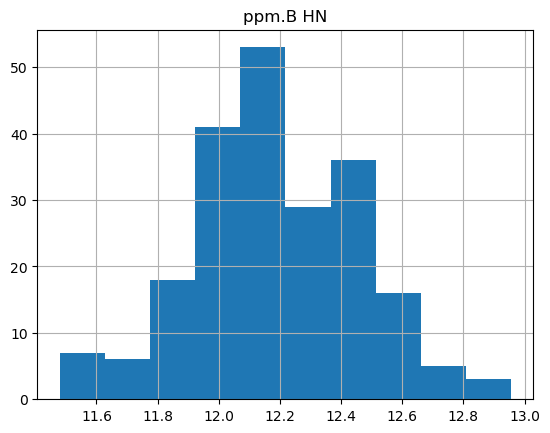

In [16]:
bio.hist('ppm.B HN')

In [17]:
bio.to_csv('bio_GWAS_outlier.csv', index=False)

In [23]:
bio.loc[bio['ppm.B HN'].isnull(), 'ppm.B HN']

38    NaN
44    NaN
135   NaN
143   NaN
184   NaN
192   NaN
200   NaN
213   NaN
Name: ppm.B HN, dtype: float64

# GWAS for principal components

In [17]:
PCs = pd.read_csv('GWAS_PCA_blups_v2.csv')

In [18]:
PCs

,genotype,Trt,Dim.1,Dim.2,Dim.3
0,B73 X Mo17,HN,0.242398,0.223001,0.021807
1,B73 X Mo17,HN,0.242398,0.223001,0.021807
2,B73 X Mo17,HN,0.242398,0.223001,0.021807
3,B73 X Mo17,HN,0.242398,0.223001,0.021807
4,B73 X Mo17,HN,0.242398,0.223001,0.021807
...,...,...,...,...,...
1195,PHK29 X PHW52,LN,-0.059703,-0.060021,-0.075441
1196,PHZ51 X LH123,HN,0.095923,-0.021276,0.004148
1197,PHZ51 X LH123,LN,-0.263610,-0.071711,0.062816
1198,PHZ51 X PHG35,LN,-0.627517,0.038990,0.107210


In [19]:
PCs_HN = PCs.loc[PCs['Trt']=='HN', :].reset_index(drop=True)
PCs_LN = PCs.loc[PCs['Trt']=='LN', :].reset_index(drop=True)

In [20]:
PCs_HN.rename(columns={'Dim.1' : 'PC1_HN', 'Dim.2' : 'PC2_HN', 'Dim.3' : 'PC3_HN'}, inplace= True)

In [21]:
PCs_LN.rename(columns={'Dim.1' : 'PC1_LN', 'Dim.2' : 'PC2_LN', 'Dim.3' : 'PC3_LN'}, inplace= True)

In [22]:
ids = pd.read_csv('BGEM_WGS_Labels.csv')
GWAS_labels = pd.read_csv('WGS_labels_only.csv')
GWAS_labels.columns
GWAS_labels.rename(columns={'UID                     ': 'UID'}, inplace=True)
GWAS_labels['UID'] = GWAS_labels['UID'].str.replace(' ' , '')
ids = ids.loc[: , ['UID', 'Genotype']]
ids.rename(columns ={'Genotype': 'genotype'}, inplace=True)

In [23]:
merged = pd.merge(ids, PCs_HN, on='genotype', how='inner')

In [24]:
merged = pd.merge(merged, PCs_LN , on='genotype', how='inner')

In [25]:
merged = pd.merge(merged, GWAS_labels, on='UID', how='inner')

In [26]:
merged.drop(['genotype', 'Trt_x', 'Trt_y'] , axis=1, inplace=True)

In [27]:
merged.to_csv('PC_GWAS_Ready_blups_v2.csv', index= False)